# Topics for Tutorial 2

1. Univariate data 
2. Summary statistics
3. Quantiles
4. Histograms
5. Bar charts
6. Encoding categorical varaibles

# Important Python Packages
* Pandas
* Seaborn
* Matplotlib

In [1]:
# import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib as plt

### Today's datasets

* City Temperatures -- Daily temperature for different international cities

In [2]:
# read CSV
temp_df = pd.read_csv('city_temp.csv')

In [3]:
# examine the data -- in visual studio code we can also do this another way
temp_df.head()

,Country,City,Month,Day,Year,AvgTemperature
0,Malawi,Lilongwe,1,1,1995,69.5
1,Malawi,Lilongwe,1,2,1995,69.5
2,Malawi,Lilongwe,1,3,1995,67.5
3,Malawi,Lilongwe,1,4,1995,68.5
4,Malawi,Lilongwe,1,5,1995,66.7


In [4]:
# which cities do we have data for
temp_df.City.unique()

array(['Lilongwe', 'Capetown', 'Tel Aviv', 'Amman', 'Beirut', 'Rochester'],
      dtype=object)

In [5]:
# isolate data from a single city (e.g., Tel Aviv)
city = 'Tel Aviv'
TA_temp = temp_df[temp_df.City == city]
TA_temp

,Country,City,Month,Day,Year,AvgTemperature
14959,Israel,Tel Aviv,1,1,1995,57.3
14960,Israel,Tel Aviv,1,2,1995,56.1
14961,Israel,Tel Aviv,1,3,1995,55.9
14962,Israel,Tel Aviv,1,4,1995,56.9
14963,Israel,Tel Aviv,1,5,1995,56.6
...,...,...,...,...,...,...
19595,Israel,Tel Aviv,9,11,2007,79.5
19596,Israel,Tel Aviv,9,12,2007,79.7
19597,Israel,Tel Aviv,9,13,2007,79.7
19598,Israel,Tel Aviv,9,14,2007,79.6


In [6]:
# get summary statistics for a single city
TA_temp.AvgTemperature.describe()

count    4641.000000
mean       54.020448
std        50.624184
min       -99.000000
25%        59.400000
50%        68.700000
75%        78.600000
max        88.500000
Name: AvgTemperature, dtype: float64

In [7]:
# eliminate data that doesn't make sense
TA_temp = TA_temp.drop(TA_temp[TA_temp['AvgTemperature']<(-50)].index)

In line of code above, `TA_temp[TA_temp['AvgTemperature']<(-50)]` creates a boolean mask which is True for all rows in the `TA_temp` DataFrame where the value in the `'AvgTemperature'` column is less than -50. The `.drop()` method is then called on the TA_temp DataFrame with this boolean mask passed as an argument to remove all rows where the condition is True. The `.index` at the end returns the index labels of the rows that were removed from the DataFrame. This allows you to keep track of which rows were dropped and potentially investigate why they were removed. In summary, `.index` is returning the index labels of the rows that satisfy the condition of `TA_temp['AvgTemperature']<(-50)` and are being removed from the TA_temp DataFrame by the `.drop()` method.

In [8]:
# convert to Celsius
TA_temp['AvgTemp_C'] = (TA_temp['AvgTemperature'] - 32)*(5/9)

In [9]:
# get summary stasitics in Celsius
TA_temp.AvgTemp_C.describe()

count    4196.000000
mean       21.249325
std         5.193370
min         7.277778
25%        16.555556
50%        21.611111
75%        26.277778
max        31.388889
Name: AvgTemp_C, dtype: float64

In [10]:
# get the mean for the city you chose
mean_temp = TA_temp.AvgTemp_C.mean() 
print(f"The mean temperature in {city} is: {mean_temp:.2f} degrees Celcius")

The mean temperature in Tel Aviv is: 21.25 degrees Celcius


In [11]:
# get the median temperature for the city you chose
median_temp = TA_temp.AvgTemp_C.median() 
print(f"The median temperature in {city} is: {median_temp:.2f} degrees Celcius")

The median temperature in Tel Aviv is: 21.61 degrees Celcius


In [12]:
# get the 10th percentile for the city you chose
percentile_10 = TA_temp.AvgTemp_C.quantile(.1) 
print(f"The tenth percentile in {city} is: {percentile_10:.2f} degrees Celcius")

The tenth percentile in Tel Aviv is: 14.17 degrees Celcius


In [13]:
# get the 90th percentile for the city you chose
percentile_90 = TA_temp.AvgTemp_C.quantile(.9) 
print(f"The ninetieth percentile in {city} is: {percentile_90:.2f} degrees Celcius")

The ninetieth percentile in Tel Aviv is: 27.67 degrees Celcius


In [14]:
# begin plotting
sns.set_theme(style="whitegrid")

[Text(0.5, 0, 'Average Daily Temperature in Tel Aviv')]

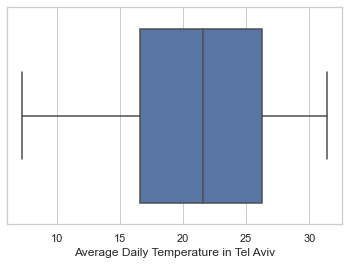

In [15]:
# make a box plot of temperature for the city you chose
ax = sns.boxplot(x=TA_temp.AvgTemp_C)
ax.set(xlabel=f'Average Daily Temperature in {city}')

[Text(0.5, 0, 'Average Daily Temperature')]

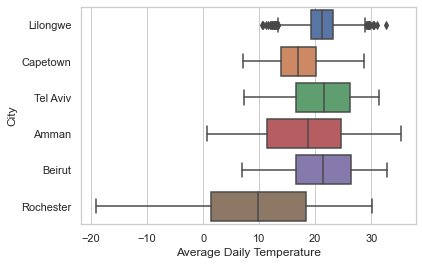

In [16]:
# compare all the cities
temp_df = temp_df.drop(temp_df[temp_df['AvgTemperature']<(-50)].index)
temp_df['AvgTemp_C'] = (temp_df['AvgTemperature'] - 32)*(5/9)
ax = sns.boxplot(x=temp_df.AvgTemp_C, y = temp_df.City)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

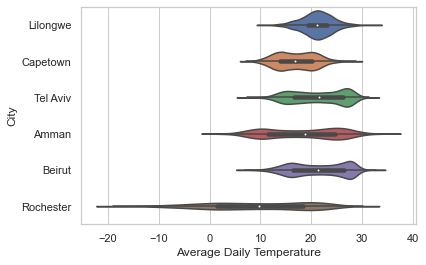

In [17]:
# make a violin plot of the temperature
ax = sns.violinplot(x=temp_df.AvgTemp_C, y = temp_df.City)
ax.set(xlabel='Average Daily Temperature')

### Try out
* plot the Average Daily Temperature of the year 2000 for all cities
* plot the Average Daily Temperature of January 1st for all cities in all years

[Text(0.5, 0, 'Average Daily Temperature in Tel Aviv')]

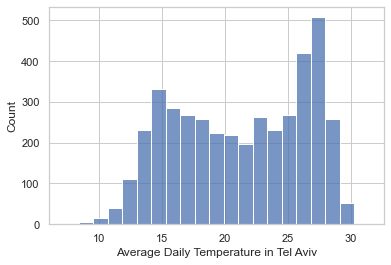

In [18]:
# make a histogram of the data for the city you chose
ax = sns.histplot(x=TA_temp.AvgTemp_C)
ax.set(xlabel=f'Average Daily Temperature in {city}')

[Text(0.5, 0, 'Average Daily Temperature')]

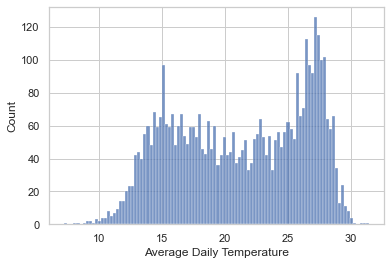

In [19]:
# play around with the bin size for the histogram -- try more bins
ax = sns.histplot(x=TA_temp.AvgTemp_C, bins=100)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

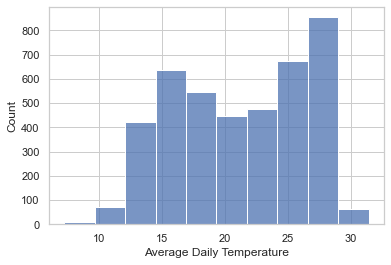

In [20]:
# now fewer bins
ax = sns.histplot(x=TA_temp.AvgTemp_C, bins=10)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

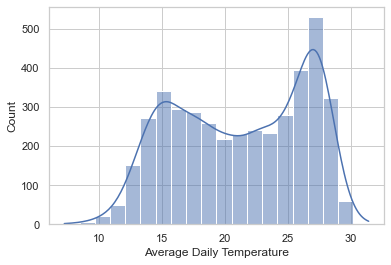

In [21]:
# add kernel density estimator
ax = sns.histplot(x=TA_temp.AvgTemp_C, bins=20, kde = True)
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

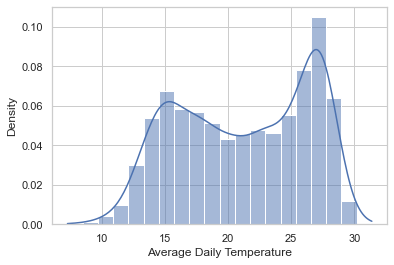

In [22]:
# how can we normalize the histogram data?
ax = sns.histplot(x=TA_temp.AvgTemp_C, bins=20, kde = True, stat = "density")
ax.set(xlabel='Average Daily Temperature')

[Text(0.5, 0, 'Average Daily Temperature')]

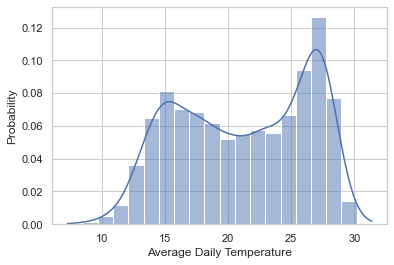

In [23]:
# what's the difference between the "density" stat and "probablity" stat  ---  https://seaborn.pydata.org/generated/seaborn.histplot.html
ax = sns.histplot(x=TA_temp.AvgTemp_C, bins=20, kde = True, stat = "probability")
ax.set(xlabel='Average Daily Temperature')

Text(21.249324753733745, 0.14, 'mean')

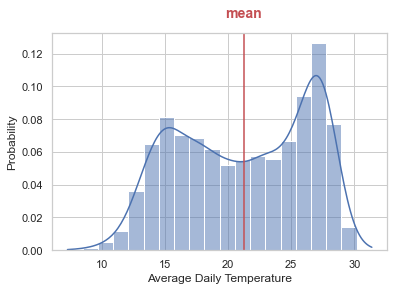

In [24]:
# add the mean to the plot
ax = sns.histplot(x=TA_temp.AvgTemp_C, bins=20, kde = True, stat = "probability")
ax.set(xlabel='Average Daily Temperature')
ax.axvline(mean_temp, label='mean', color='r')
ax.text(mean_temp,0.14, 'mean', va='bottom', ha='center', fontsize=14, weight='bold', color='r') 

### Try out
* add the mode
* add the median

[Text(0.5, 0, 'Average Daily Temperature')]

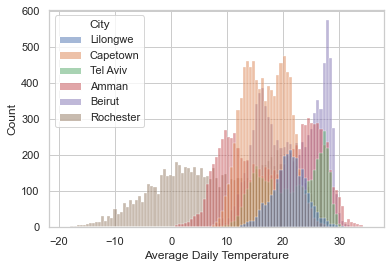

In [25]:
# make a histogram of the data
ax = sns.histplot(x=temp_df.AvgTemp_C, hue=temp_df.City)
ax.set(xlabel='Average Daily Temperature')

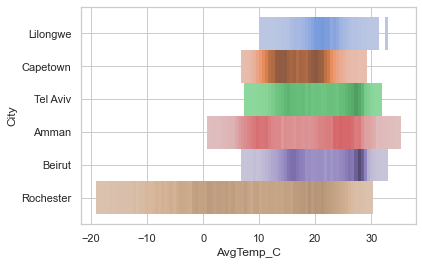

In [26]:
# another type of histogram
ax = sns.histplot(x=temp_df.AvgTemp_C, y=temp_df.City, hue = temp_df.City, legend = False)

### Encoding categorical variables

Sometimes, for reasons that will be clear on the HW, we'll want to encode our categorical variables so that they are numbers instead. 

There are many ways that we can achive this. 

Here will learn one, for more examples see: https://pbpython.com/categorical-encoding.html

In [27]:
# what are our cities again?
temp_df.City.unique()

array(['Lilongwe', 'Capetown', 'Tel Aviv', 'Amman', 'Beirut', 'Rochester'],
      dtype=object)

In [28]:
# dictionary for encoding cities (note: we can encode more than one variable at a time)
cleanup_cities = {"City": {"Lilongwe": 1, 
                           "Capetown": 2,
                           "Tel Aviv": 3,
                           "Amman": 4,
                           "Beirut": 5,
                           "Rochester": 6}}

In [29]:
# new dataframe with encoded values
temp_df_encoded = temp_df.replace(cleanup_cities)


In [30]:
# option 2 -- use Pandas

# what are our data types?
temp_df.dtypes


Country            object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
AvgTemp_C         float64
dtype: object

In [31]:
# assign city to be a categorical variable
temp_df["City"] = temp_df["City"].astype('category')


In [32]:
# use codes to encode variable
temp_df["City_encoded"] = temp_df["City"].cat.codes
